In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


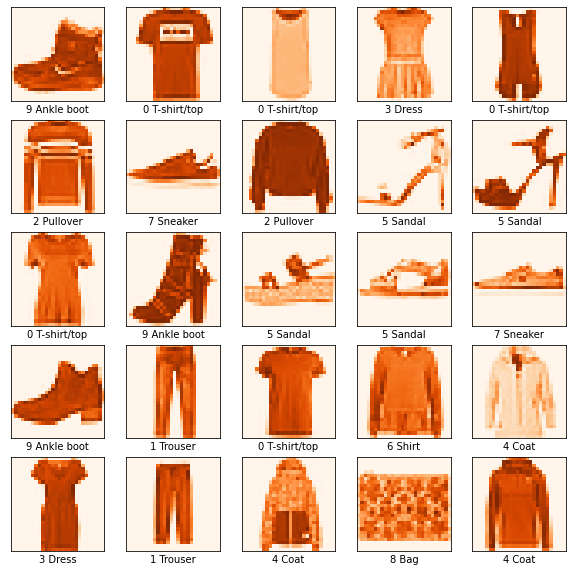

In [3]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap="Oranges") 
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i]])) 
plt.show()

In [4]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_ds(x, y, num_classes=10):
  y = tf.one_hot(y, depth=num_classes)
  ds = tf.data.Dataset.from_tensor_slices((x, y))
  pp_ds = ds.map(preprocess)
  s_ds = pp_ds.shuffle(len(y))
  batched_ds = s_ds.batch(128)
  return batched_ds


In [5]:
training_data = create_ds(x_train, y_train)
testing_data = create_ds(x_test, y_test)

In [6]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    training_data.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=testing_data.repeat(), 
    validation_steps=2
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 9s 13ms/step - loss: 0.4958 - accuracy: 0.8247 - val_loss: 0.4145 - val_accuracy: 0.8516
Epoch 2/10
500/500 [==============================] - 6s 12ms/step - loss: 0.3559 - accuracy: 0.8698 - val_loss: 0.3172 - val_accuracy: 0.9023
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 0.3236 - accuracy: 0.8802 - val_loss: 0.3089 - val_accuracy: 0.8945
Epoch 4/10
500/500 [==============================] - 6s 12ms/step - loss: 0.2948 - accuracy: 0.8909 - val_loss: 0.4161 - val_accuracy: 0.8398
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 0.2789 - accuracy: 0.8957 - val_loss: 0.3323 - val_accuracy: 0.8750
Epoch 6/10
500/500 [==============================] - 6s 12ms/step - loss: 0.2660 - accuracy: 0.8993 - val_loss: 0.3107 - val_accuracy: 0.8828
Epoch 7/10
500/500 [==============================] - 6s 12ms/step - loss: 0.2444 - accuracy: 0.9068 - val_loss: 0.3560 - val_accuracy: 0.8750
Epoch 8/10

In [8]:
predictions = model.predict(testing_data)

few_predictions = predictions[0:3]
for i in range(3):
  print(np.argmax(few_predictions[i]))

79/79 [==============================] - 1s 7ms/step
1
2
8
